In [94]:
#importing libaries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('Data.csv')


In [95]:
#Lets find out what our data contains
print(df.head())
print(df.describe())
print(df.head(10))

   HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
0       0.0                0.0          0.0                   0.0   
1       0.0                0.0          0.0                   0.0   
2       0.0                0.0          0.0                   0.0   
3       0.0                0.0          0.0                   0.0   
4       1.0                0.0          0.0                   0.0   

   ProductDescriptionPage  ProductDescriptionPage_Duration  \
0                     1.0                         0.000000   
1                     2.0                         2.666667   
2                    10.0                       627.500000   
3                     1.0                         0.000000   
4                     0.0                         0.000000   

   GoogleMetric:Bounce Rates  GoogleMetric:Exit Rates  \
0                       0.20                     0.20   
1                       0.05                     0.14   
2                       0.02             

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [97]:
#Now we find missing values in the data
total = df.isnull().sum()
print(total)

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Made_Purchase'),
  Text(1, 0, 'Zone'),
  Text(2, 0, 'WeekendPurchase'),
  Text(3, 0, 'SearchEngine'),
  Text(4, 0, 'ProductDescriptionPage'),
  Text(5, 0, 'GoogleMetric:Exit Rates'),
  Text(6, 0, 'Marital Status'),
  Text(7, 0, 'GoogleMetric:Page Values'),
  Text(8, 0, 'OS'),
  Text(9, 0, 'LandingPage_Duration'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Type of Traffic'),
  Text(12, 0, 'Cookies Setting'),
  Text(13, 0, 'CustomerType'),
  Text(14, 0, 'Month_SeasonalPurchase'),
  Text(15, 0, 'Gender'),
  Text(16, 0, 'HomePage_Duration'),
  Text(17, 0, 'SeasonalPurchase'),
  Text(18, 0, 'GoogleMetric:Bounce Rates'),
  Text(19, 0, 'LandingPage'),
  Text(20, 0, 'HomePage'),
  Text(21, 0, 'ProductDescriptionPage_Duration')])

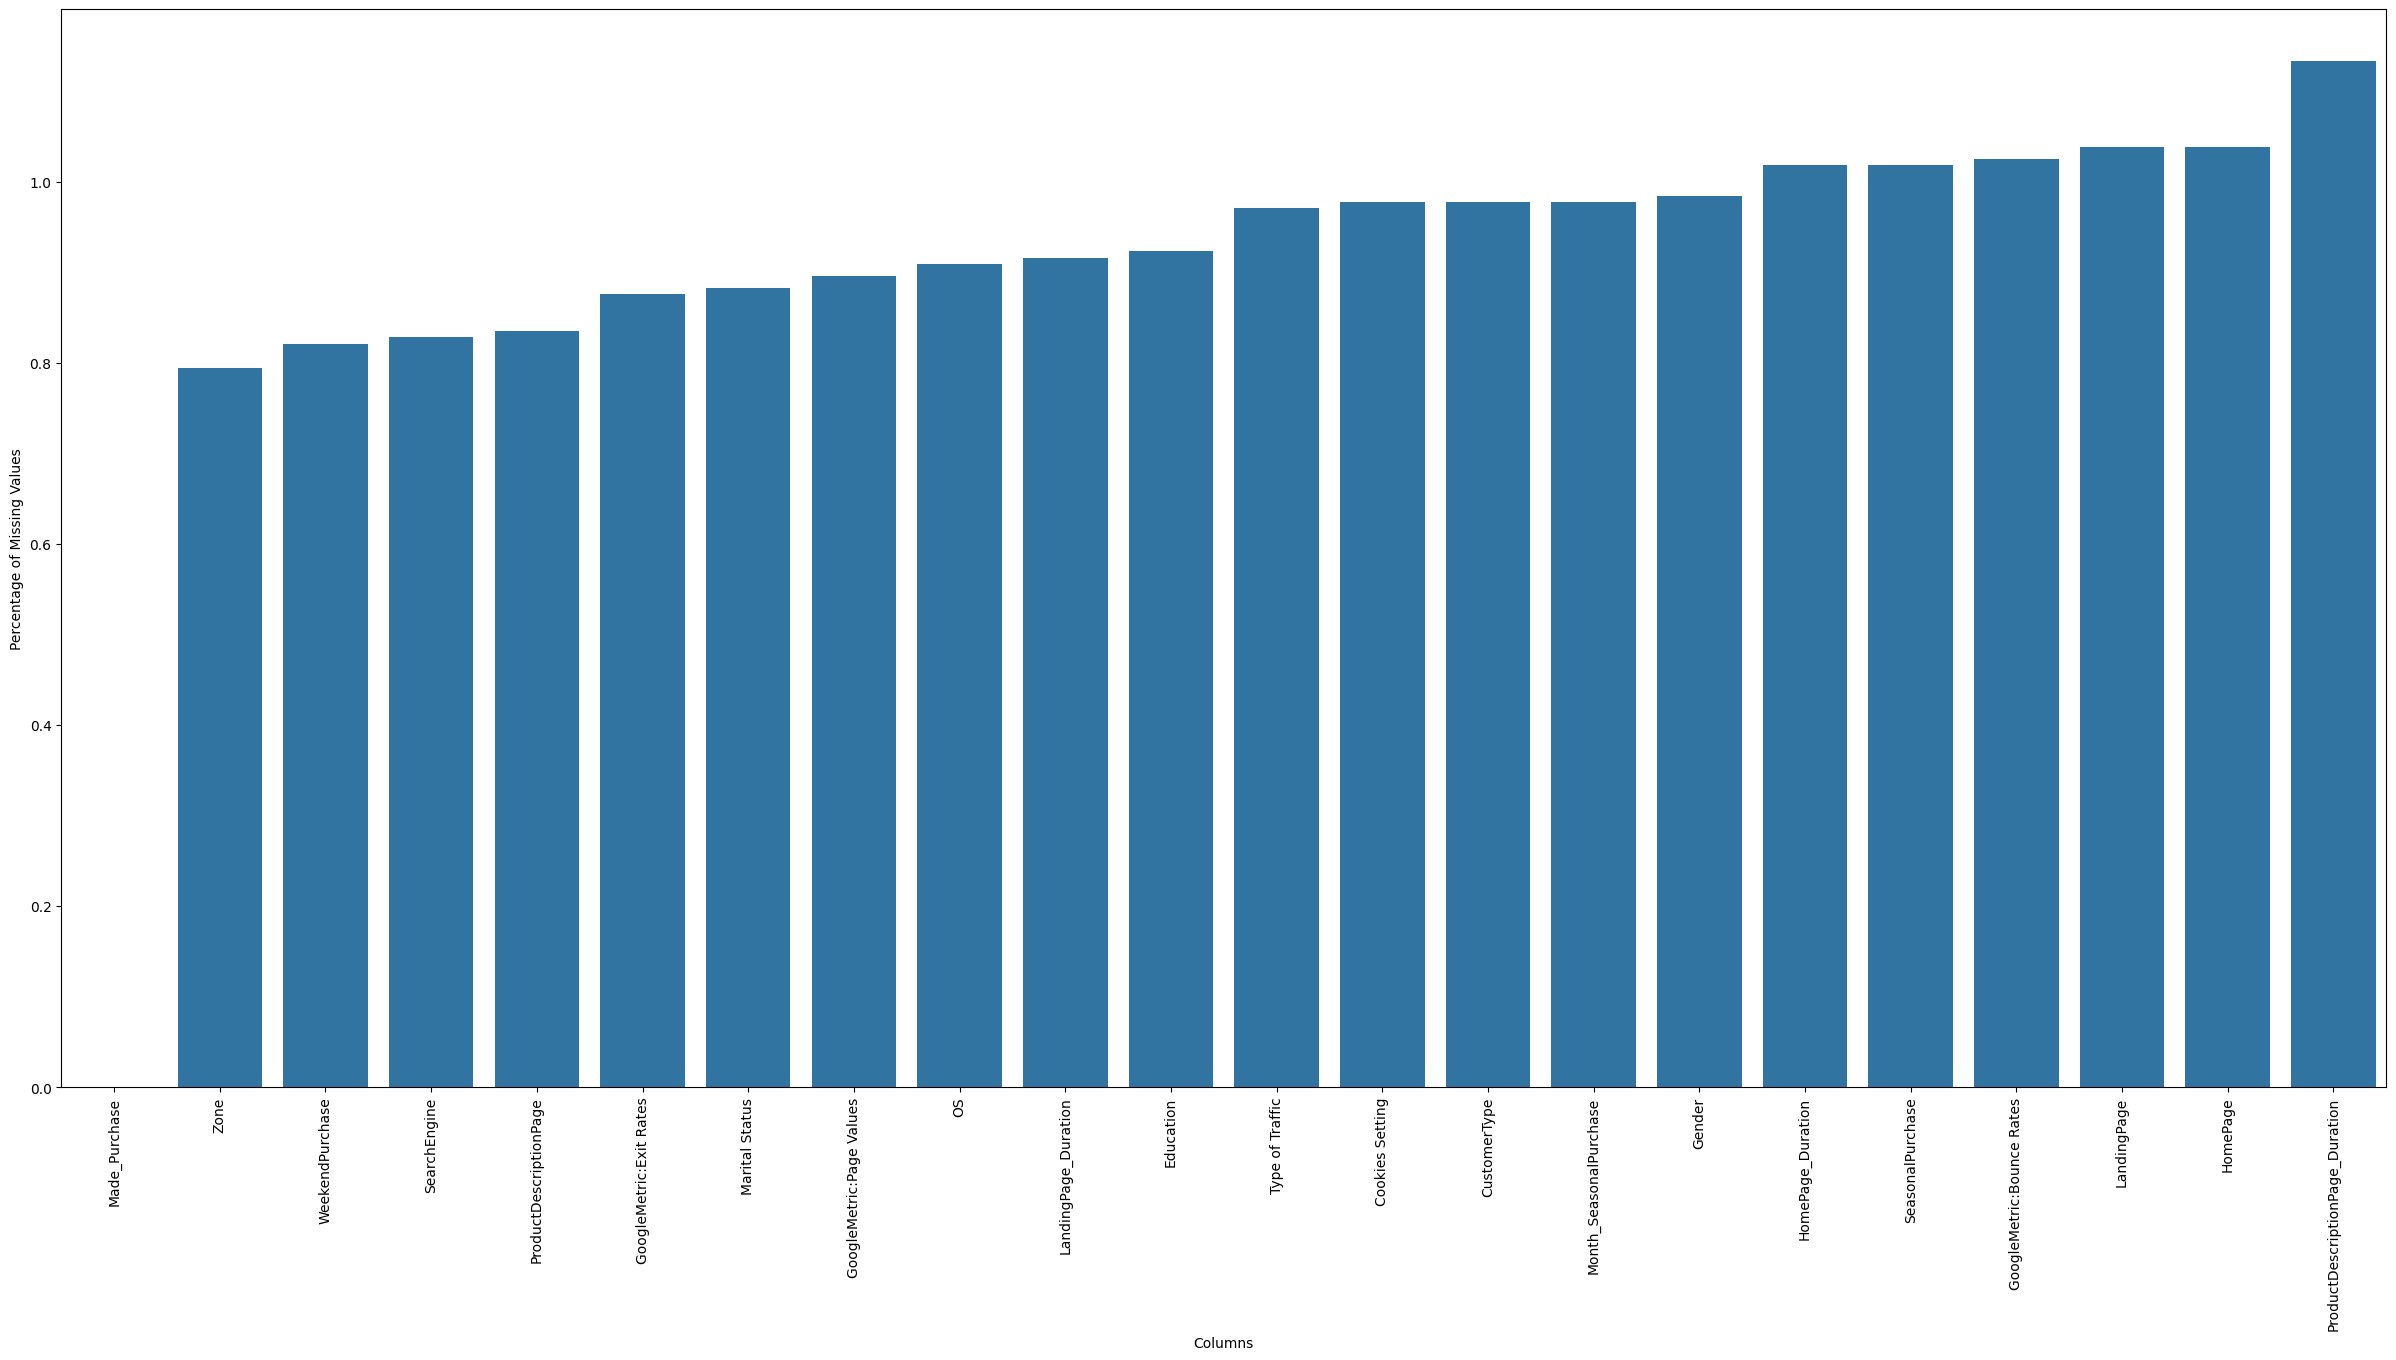

In [98]:
#Exploring the missing data
percentage1 = (df.isnull().sum() / len(df)) * 100
percentage2 = percentage1.sort_values(ascending=True)
plt.figure(figsize=(30, 14))
sns.barplot(x=percentage2.index, y=percentage2)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)

In [99]:
#Handling missing data
df.fillna(0, inplace=True)
print(df.isnull().sum())
#Alternatively, you could also remove the outliers over the 0.75 quartile

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  float64
 12  SearchEngine      

<Axes: xlabel='HomePage', ylabel='Count'>

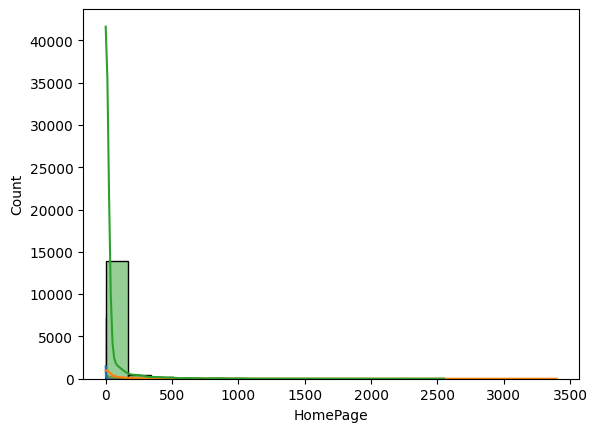

In [33]:
#Now for some visualisations of the data
sns.histplot(data=df, x="HomePage", kde=True)

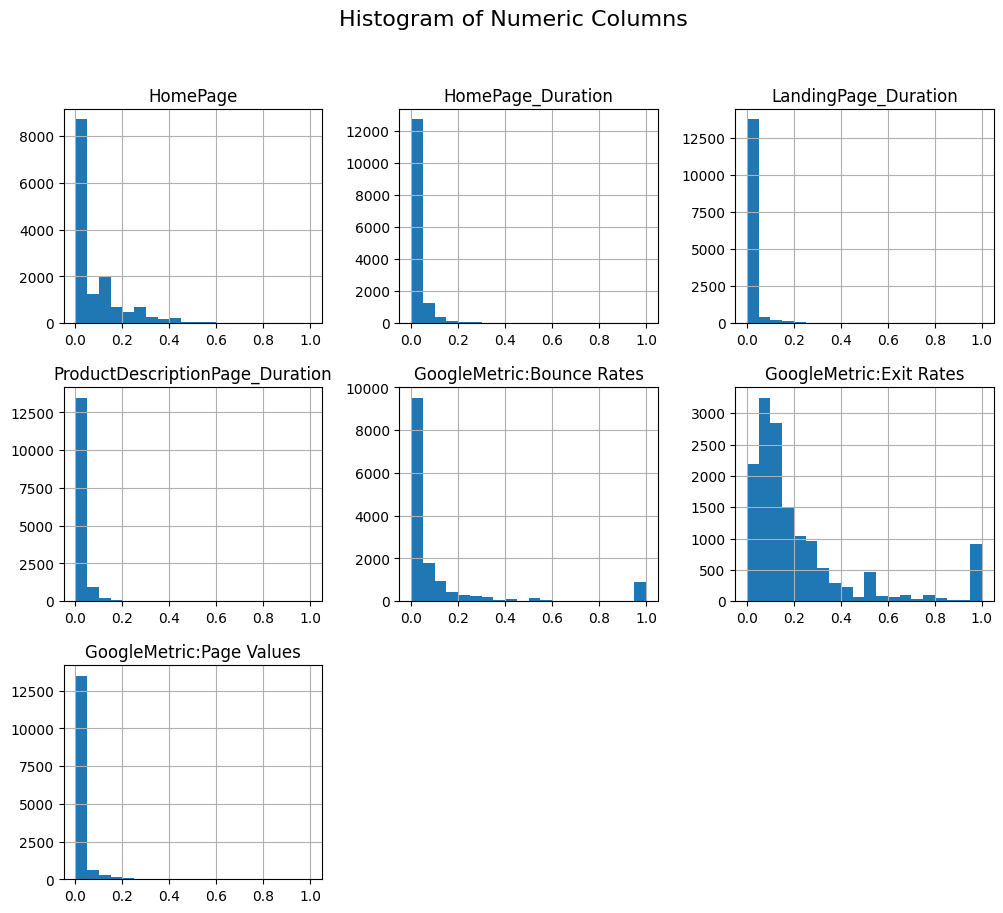

In [139]:
numeric_columns = ['HomePage', 'HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration',
                   'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values']

df[numeric_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of Numeric Columns', fontsize=16)
plt.show()

<ipython-input-142-a96359e1a131>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


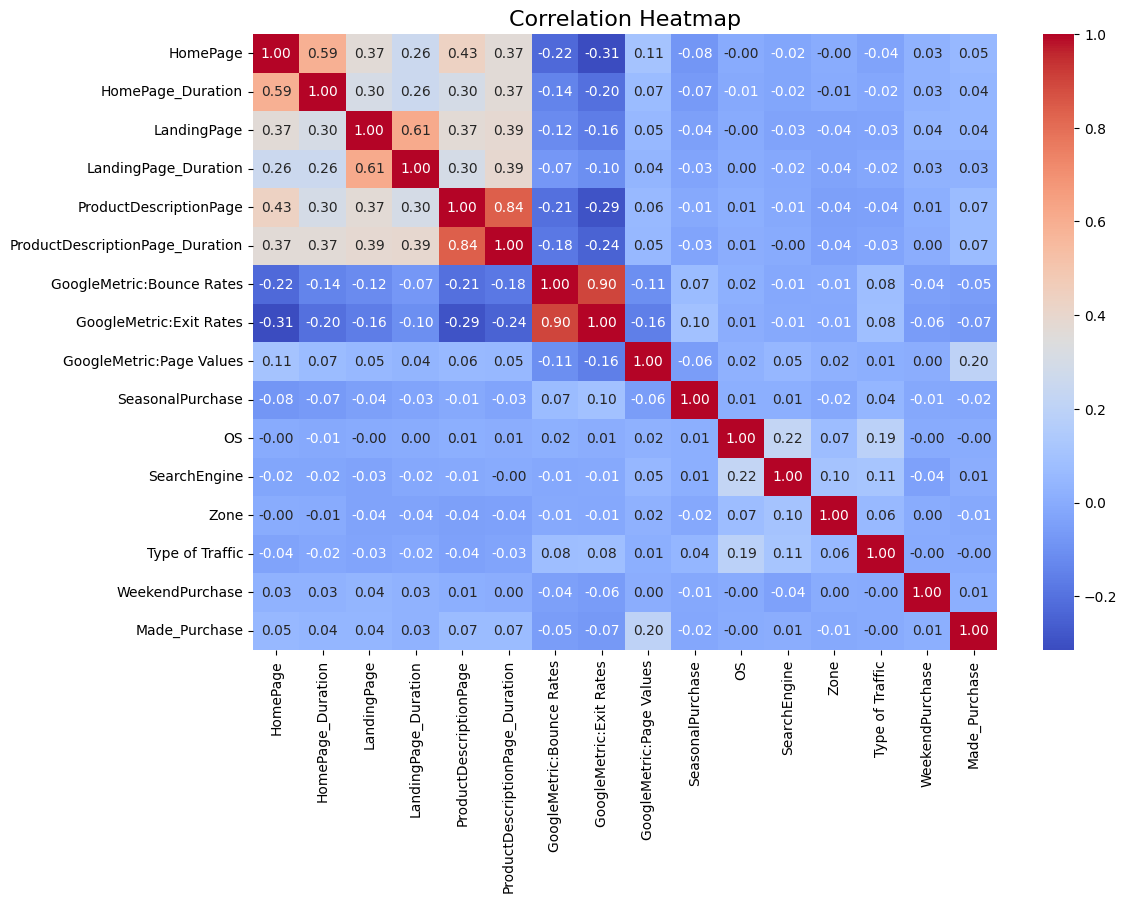

In [142]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<ipython-input-144-7f4ef750ca53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Made_Purchase', data=df, palette='Set1')


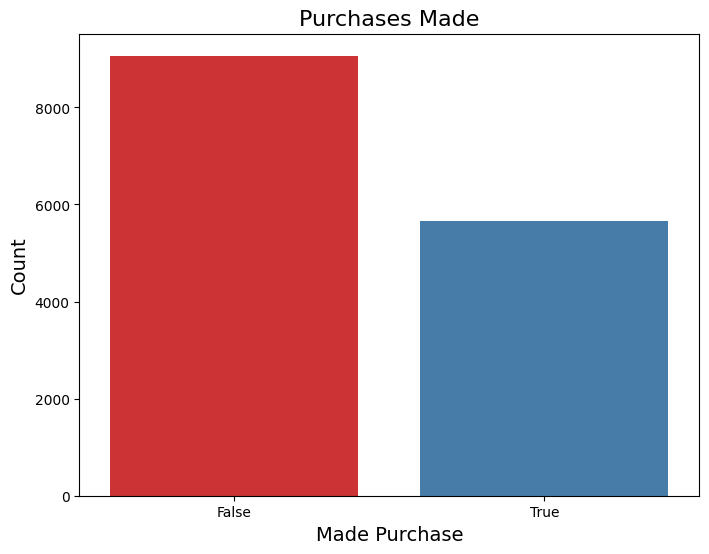

In [144]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Made_Purchase', data=df, palette='Set1')
plt.title('Purchases Made', fontsize=16)
plt.xlabel('Made Purchase', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<Axes: xlabel='LandingPage_Duration', ylabel='Count'>

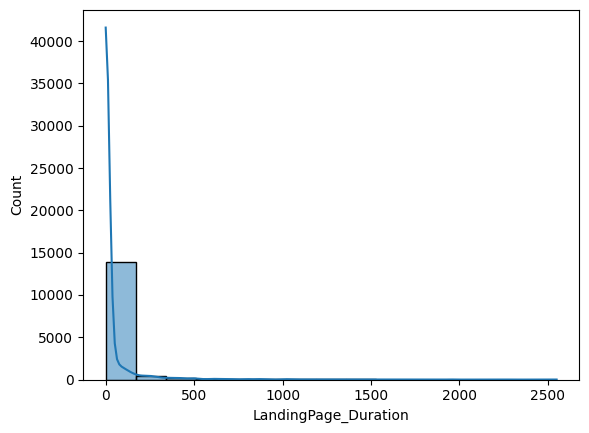

In [37]:
sns.histplot(data=df, x="LandingPage_Duration", kde=True)

<Axes: xlabel='Type of Traffic', ylabel='Count'>

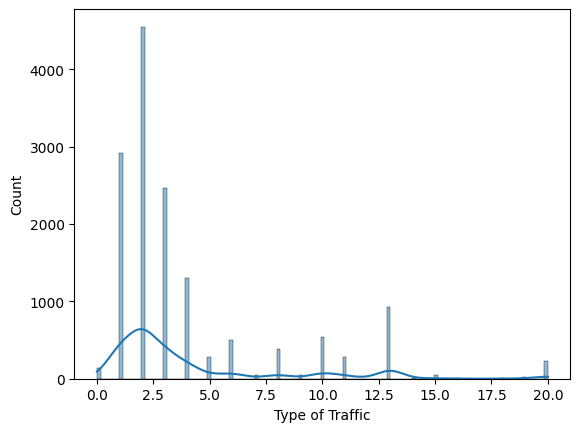

In [39]:
sns.histplot(data=df, x="Type of Traffic", kde=True)

<Axes: xlabel='HomePage_Duration', ylabel='Count'>

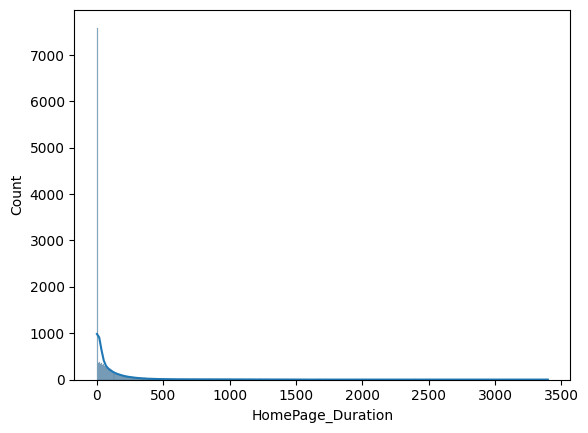

In [36]:
sns.histplot(data=df, x="HomePage_Duration", kde=True)

<Axes: xlabel='Month_SeasonalPurchase', ylabel='count'>

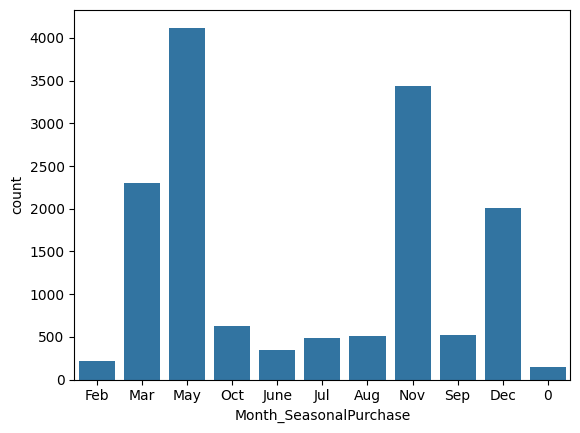

In [35]:
sns.countplot(x='Month_SeasonalPurchase', data=df)

<Axes: xlabel='HomePage', ylabel='count'>

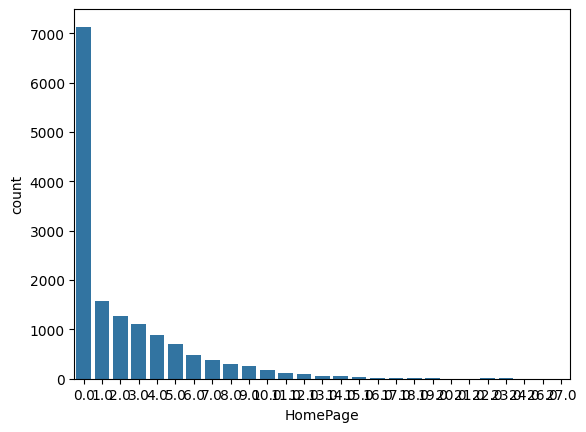

In [46]:
sns.countplot(x='HomePage', data=df)

In [101]:
print(df.columns)
print(df.info())

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescription

In [103]:
#Converting categorical columns into category
categorical_columns = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   HomePage                         14731 non-null  float64 
 1   HomePage_Duration                14731 non-null  float64 
 2   LandingPage                      14731 non-null  float64 
 3   LandingPage_Duration             14731 non-null  float64 
 4   ProductDescriptionPage           14731 non-null  float64 
 5   ProductDescriptionPage_Duration  14731 non-null  float64 
 6   GoogleMetric:Bounce Rates        14731 non-null  float64 
 7   GoogleMetric:Exit Rates          14731 non-null  float64 
 8   GoogleMetric:Page Values         14731 non-null  float64 
 9   SeasonalPurchase                 14731 non-null  float64 
 10  Month_SeasonalPurchase           14731 non-null  category
 11  OS                               14731 non-null  float64 
 12  Sear

In [105]:
#Using MinMax Scaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=['float64']).columns
# Reshape the numerical columns into a 2D array with the same number of elements as the original DataFrame columns
reshaped_data = df[numerical_columns].values.reshape(-1, len(numerical_columns))

# Scale the reshaped data using the MinMaxScaler
scaled_data = scaler.fit_transform(reshaped_data)

# Create a new DataFrame with the scaled data and assign it to the original DataFrame's numerical columns
df[numerical_columns] = scaled_data

In [106]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.076923,1.000000,0.15,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0.153846,0.222222,0.20,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,0.230769,0.111111,0.20,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.4,...,0.307692,0.333333,0.15,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,0.037037,0.0,0.0,0.0,0.000000,0.000000,1.00,1.00,0.0,0.0,...,0.153846,0.111111,0.25,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   HomePage                         14731 non-null  float64 
 1   HomePage_Duration                14731 non-null  float64 
 2   LandingPage                      14731 non-null  float64 
 3   LandingPage_Duration             14731 non-null  float64 
 4   ProductDescriptionPage           14731 non-null  float64 
 5   ProductDescriptionPage_Duration  14731 non-null  float64 
 6   GoogleMetric:Bounce Rates        14731 non-null  float64 
 7   GoogleMetric:Exit Rates          14731 non-null  float64 
 8   GoogleMetric:Page Values         14731 non-null  float64 
 9   SeasonalPurchase                 14731 non-null  float64 
 10  Month_SeasonalPurchase           14731 non-null  category
 11  OS                               14731 non-null  float64 
 12  Sear

In [115]:
# Apply one-hot encoding to categorical columns
one_hot = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenate one-hot encoded columns with the original dataset
data_encoded = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns as they are no longer needed
data_encoded = data_encoded.drop(categorical_columns, axis=1)

data_encoded.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
1,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
2,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,0.000000,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.4,...,1,0,0,1,0,0,0,0,0,1
4,0.037037,0.0,0.0,0.0,0.000000,0.000000,1.00,1.00,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0


In [121]:
#Now we can split the data into train and test data
from sklearn.model_selection import train_test_split
X = data_encoded.drop('Made_Purchase', axis=1)
Y = data_encoded['Made_Purchase']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


Training set shape: (11784, 41) (11784,)
Testing set shape: (2947, 41) (2947,)


In [122]:
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,0.082477,0.023095,0.020235,0.013003,0.044391,0.018303,0.115632,0.221365,0.013184,0.063431,0.262889,0.179778,0.347845,0.202522,0.232231
std,0.121440,0.052559,0.051952,0.054735,0.063548,0.031294,0.249046,0.249336,0.046488,0.201651,0.116534,0.132918,0.267990,0.202022,0.422270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002532,0.000000,0.071429,0.000000,0.000000,0.250000,0.153846,0.111111,0.100000,0.000000
50%,0.037037,0.001177,0.000000,0.000000,0.024113,0.008902,0.016129,0.130435,0.000000,0.000000,0.250000,0.153846,0.333333,0.100000,0.000000
75%,0.111111,0.026480,0.000000,0.000000,0.052482,0.022202,0.088235,0.250000,0.000000,0.000000,0.375000,0.153846,0.444444,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
#Training the model
log_model.fit(X_train, Y_train)
#Predicting
Y_pred = log_model.predict(X_test)

accuracy1 = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)


print(accuracy1)
print(precision)


0.6827281981676281
0.7509881422924901


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Evaluating
accuracy2 = accuracy_score(Y_test, Y_pred)
print(accuracy2)

0.5252799457074991


In [137]:
#Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train the model on the training data
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

# Evaluating
accuracy3 = accuracy_score(Y_test, Y_pred)
print(accuracy3)

0.6487953851374278


In [138]:
#Final results
metrics_dict = {
    "Classifier": [
        "Logistic Regression",
        "Random Forest",
        "Gaussian",
    ],
    "Accuracy": [
        accuracy1,
        accuracy2,
        accuracy3
    ]}
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame as a table
print(metrics_df)

            Classifier  Accuracy
0  Logistic Regression  0.682728
1        Random Forest  0.525280
2             Gaussian  0.648795
